In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess


class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "ESS"
    
    # URL(s) to start with.
    start_urls = [
        'https://sandiego.craigslist.org/search/roo?max_price=1700',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
            
        # Iterate over every <article> element on the page.
        for article in response.xpath('//li'):
            for result in response.xpath('//p[@class="result-info"]'):
                title = result.xpath('a/text()').extract_first()
                price = result.xpath('span[@class="result-meta"]/span[@class="result-price"]/text()').extract_first()
                # Yield a dictionary with the values we want.
                yield {
                    'title': title,
                    'price': price
                }

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'firstpage.json',  # Name our storage file.
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()
print('Success!')

Success!


In [2]:
import pandas as pd

Monty=pd.read_json('firstpage.json', orient='columns')
print(Monty.shape)
print(Monty.head())

(23520, 2)
   price                                              title
0   $800                  Large Room with Full Private Bath
1    $50     /day! Huge private room for couple in UTC area
2  $1000            Roommate wanted in North Park-UTIL INCL
3   $900  1bed with private bath downtown Oside near bea...
4   $715              Centrally Located Room in Great House


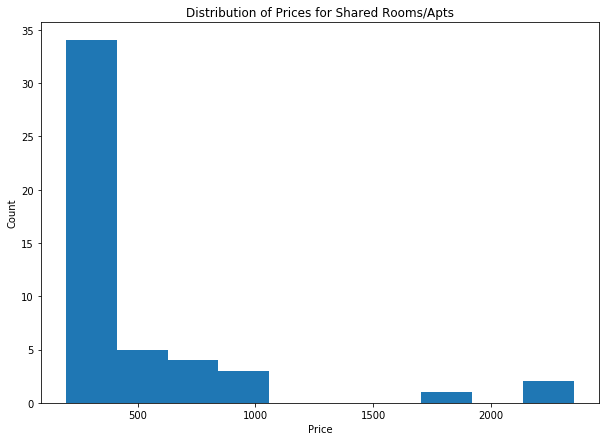

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.hist(pd.value_counts(Monty['price']))
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices for Shared Rooms/Apts')
plt.show()
